In [1]:
# ==================== 📂 Mount Drive ====================
from google.colab import drive
drive.mount('/content/drive')

# ==================== 📦 Imports ====================
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_preprocess
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# ==================== 🔧 Paths & Configs ====================
project_path = "/content/drive/MyDrive/Brain_Tumor_Detection_Project/BrainTumorMRIDataset"
train_dir = os.path.join(project_path, "Training")
test_dir = os.path.join(project_path, "Testing")

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 15
model_name = "EfficientNetB0"

# ==================== 🧪 Data Generators with Proper Preprocessing ====================
train_datagen = ImageDataGenerator(
    preprocessing_function=effnet_preprocess,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(preprocessing_function=effnet_preprocess)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)




Mounted at /content/drive
Found 5722 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [2]:
# ==================== 🏗 Model ====================
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# ==================== 🧠 Train ====================
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS
)

# ==================== 📈 Evaluation ====================
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
test_loss, test_acc = model.evaluate(test_generator)

result_str = (
    f"Train Accuracy: {train_acc * 100:.2f}%\n"
    f"Train Loss: {train_loss:.4f}\n"
    f"Test Accuracy: {test_acc * 100:.2f}%\n"
    f"Test Loss: {test_loss:.4f}\n"
)
print(result_str)

# ==================== 💾 Save Results ====================
os.makedirs("/content/drive/MyDrive/Brain_Tumor_Detection_Project/results", exist_ok=True)
os.makedirs("/content/drive/MyDrive/Brain_Tumor_Detection_Project/models", exist_ok=True)

# Save model
model.save(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/models/{model_name}_brain_tumor_model.keras")

# Save evaluation
with open(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_evaluation_results.txt", "w") as f:
    f.write(result_str)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 1342s 7s/step - accuracy: 0.7270 - loss: 0.8319 - val_accuracy: 0.8711 - val_loss: 0.3139
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 520ms/step - accuracy: 0.8551 - loss: 0.3933 - val_accuracy: 0.8902 - val_loss: 0.2842
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 94s 524ms/step - accuracy: 0.8827 - loss: 0.3078 - val_accuracy: 0.8833 - val_loss: 0.3040
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 498ms/step - accuracy: 0.8862 - loss: 0.2855 - val_accuracy: 0.9108 - val_loss: 0.2311
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 94s 523ms/step - accuracy: 0.8963 - loss: 0.2741 - val_accuracy: 0.9062 - val_loss: 0.2402
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 137s 498ms/step - accuracy: 0.9132 - loss: 0.2301 - val_accuracy: 0.9092 - val_loss: 0.2410
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 522ms/step - accuracy: 0.9117 - loss: 0.2365 - val_accuracy: 0.9130 - val_loss: 0.2168
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 521ms/step - accuracy: 0.9146 - loss: 0

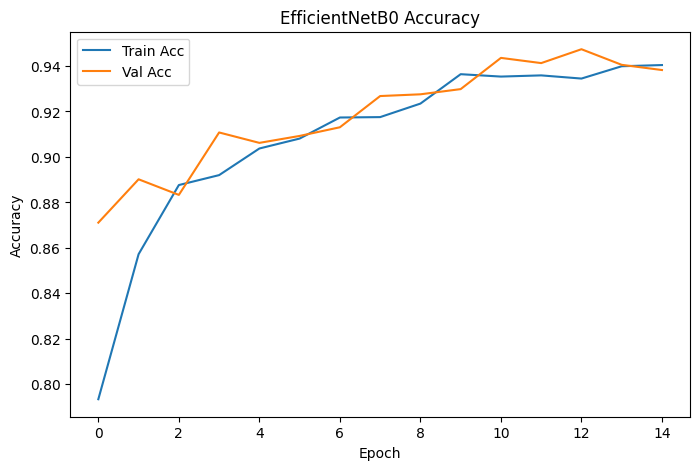

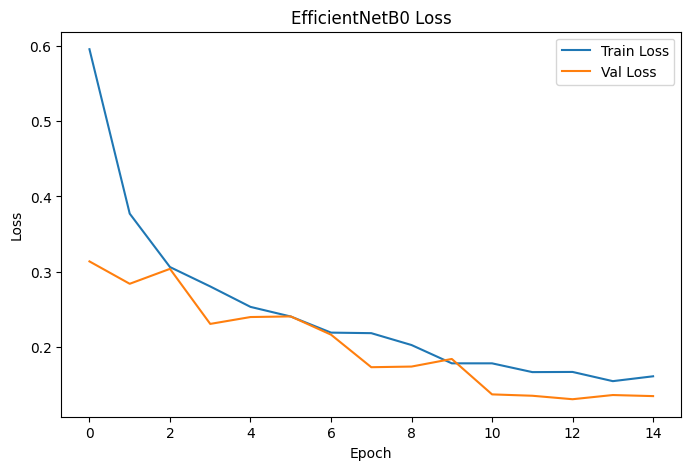

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step


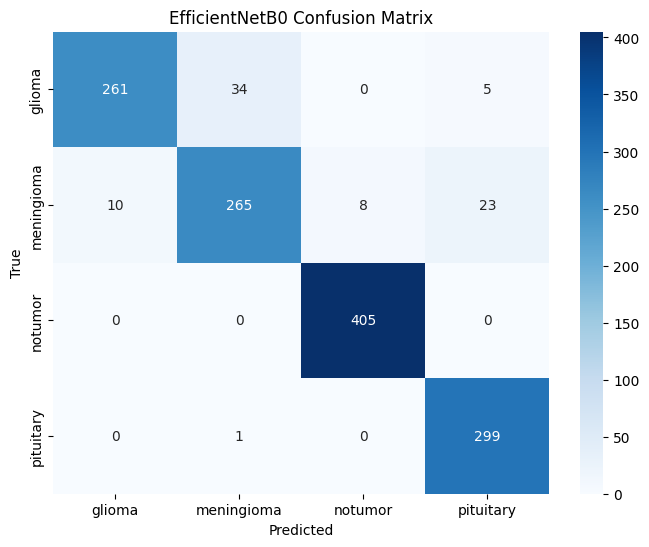

              precision    recall  f1-score   support

      glioma       0.96      0.87      0.91       300
  meningioma       0.88      0.87      0.87       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.91      1.00      0.95       300

    accuracy                           0.94      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.94      0.94      1311



In [4]:
# ==================== 📊 Plot Accuracy & Loss ====================
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title(f'{model_name} Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_accuracy_plot.png")
plt.show()
plt.close()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title(f'{model_name} Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_loss_plot.png")
plt.show()
plt.close()

# ==================== 📉 Confusion Matrix & Classification Report ====================
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'{model_name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_confusion_matrix.png")
plt.show()
plt.close()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)
with open(f"/content/drive/MyDrive/Brain_Tumor_Detection_Project/results/{model_name}_classification_report.txt", "w") as f:
    f.write(report)
